# Introduction
___The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.___

This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

# Questions:


   **Ratings of dogs based on type**
   
   **Best dog according to rating**
   
   **Tweets based on hour of the day**
   
   **Tweets based on the days of the week**
   
   **Tweets based on month**

# Data Wrangling

## Gathering Data

In [1]:
#Importing the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import requests
import os
import glob
import re
import tweepy
import time
import math


%matplotlib inline
plt.style.use('ggplot')

***Download the file***

In [2]:
folder_name = 'Data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name ,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [4]:
#loading data
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
image_df = pd.read_csv('Data/image-predictions.tsv',sep='\t')

In [4]:
# Declare Twitter API keys and access tokens
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [6]:
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [1]:
# Using the tweet IDs in the Twitter archive, query the Twitter API for each tweet's JSON

start = time.time() # start timer

with open('getstatus_error.txt','w') as errfile: 
    valid_ids = 0
    err_ids = 0
    tweet_ids = twitter_df.tweet_id
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                # Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json
                
                # Write each tweet's JSON data to its own line in a file
                json.dump(json_content, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', err_ids))
        
end = time.time() # end timer
print((end - start)/(1000*60))

***Read Json File***

In [7]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
tweets = []
with open('tweet-json.txt','r') as  json_file:
    for line in json_file:
        data = json.loads(line)
    
        # Append to list of dictionaries
        tweets.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],
                        'display_text_range': data['display_text_range']
                      })
        
# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweet_df = pd.DataFrame( tweets , columns =['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])    

## Accessing Data
### Visual Assessment

In [8]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
tweet_df

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"
5,891087950875897856,3261,20562,"[0, 138]"
6,890971913173991426,2158,12041,"[0, 140]"
7,890729181411237888,16716,56848,"[0, 118]"
8,890609185150312448,4429,28226,"[0, 122]"
9,890240255349198849,7711,32467,"[0, 133]"


## Programmatic Assessment

In [11]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
twitter_df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2035,671735591348891648,NaN,NaN,2015-12-01 17:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's ready for Christmas. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671735591...,11,10,Oscar,None,None,None,None


In [14]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [18]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [21]:
# Check if there are any records in twitter_df which are retweets
len(twitter_df[twitter_df.retweeted_status_id.isnull() == False])

181

In [22]:
# Check if there are any records in twitter_df whose corresponding record with same tweet_id is missing in image_df table
len(twitter_df[~twitter_df.tweet_id.isin(image_df.tweet_id)])

281

In [23]:
#Sort by rating_denominator values
twitter_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [24]:
# Sort by rating_numerator values
twitter_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [25]:
twitter_df.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

In [26]:
# Number of records whose both doggo and floofer columns are not None
len(twitter_df[(twitter_df.doggo != 'None') & (twitter_df.floofer != 'None')])

1

In [27]:
# Number of records whose both doggo and pupper columns are not None
len(twitter_df[(twitter_df.doggo != 'None') & (twitter_df.pupper != 'None')])

12

In [28]:
# Number of records whose both doggo and pupper columns are not None
len(twitter_df[(twitter_df.doggo != 'None') & (twitter_df.puppo != 'None')])

1

In [29]:
# Number of records whose both floofer and pupper columns are not None
len(twitter_df[(twitter_df.floofer != 'None') & (twitter_df.pupper != 'None')])

0

In [30]:
# Number of records whose both floofer and puppo columns are not None
len(twitter_df[(twitter_df.floofer != 'None') & (twitter_df.puppo != 'None')])

0

In [31]:
# Number of records whose both pupper and puppo columns are not None
len(twitter_df[(twitter_df.pupper != 'None') & (twitter_df.puppo != 'None')])

0

In [32]:
twitter_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [33]:
image_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [34]:
image_df.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone', 'Rottweiler',
       'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [35]:
image_df.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua', 'Shih-Tzu',
       'Pomeranian', 'dingo', 'power_drill', 'Saluki', 'Great_Pyrenees',
       'West_Highland_white_terrier', 'collie', 'toy_poodle', 'vizsla',
       'acorn', 'giant_schnauzer', 'teddy', 'common_iguana', 'wig',
       'water_buffalo', 'coyote', 'seat_belt', 'kelpie', 'space_heater',
       'Brabancon_griffon', 'standard_poodle', 'beagle',
       'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

## Data Quality Issues

___1-Many null values___

      in_reply_to_status_id

      in_reply_to_user_id

      retweeted_status_id

      retweeted_status_user_id


___2-Incorrect data types___

        tweet_id

        in_reply_to_status_id

        in_reply_to_user_id

        retweeted_status_id

        retweeted_status_user_id


___3-datetime format for___

        timestamp

        retweeted_status_timestamp


___4-rating_denominator has minimum value as 0 which is not possible for denominators___


___5-Retweets need to be removed to avoid duplication in our analysis. This may be done by removing rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp___

___6-Add rating column as the ratio of numerator and denominator___

___7-unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>___

___8-Some numerators are wrongly entered. They are different as in the comments___



## Data Tidiness Issues

__1-category column can be created to store the type of dog instead of the last 4 columns named as doggo, floofer, pupper, puppo__

__2-Information about one type of observational unit (tweets) is spread across three different dataframes. Therefore, these three dataframes should be merged as they are part of the same observational unit.__

___3-Reorder the columns into similar ones close to each other after adding or removing some extra columns___



## Data Cleaning
__Make a copy for the Data__

In [36]:
twitter_df_clean = twitter_df.copy()
image_df_clean = image_df.copy()
tweet_df_clean = tweet_df.copy()

### Define

-Retweets need to be removed to avoid duplication in our analysis. This may be done by removing rows that have non-empty retweeted_status_id

### Code


In [37]:
twitter_df_clean = twitter_df_clean[twitter_df_clean['retweeted_status_id'].isnull()]


### Test

In [38]:
len(twitter_df_clean[twitter_df_clean.retweeted_status_id.isnull() == False])


0

In [39]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

***8-twitter_df_clean: many tweet_id(s) of twitter_df_clean table are missing in image_df (image predictions) table***
### Define

***Keep only those records in twitter_df_clean table whose tweet_id exists in image_df table***
### Code


In [40]:
twitter_df_clean = twitter_df_clean[twitter_df_clean.tweet_id.isin(image_df_clean.tweet_id)]

### Test

In [41]:
len(twitter_df_clean[~twitter_df_clean.tweet_id.isin(image_df_clean.tweet_id)])

0

In [42]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

In [43]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Define
___2-Convert Incorrect data types___

    tweet_id

    in_reply_to_status_id

    in_reply_to_user_id

    retweeted_status_id

    retweeted_status_user_id
### Code

In [44]:
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype('str')
twitter_df_clean['in_reply_to_status_id'] = twitter_df_clean['in_reply_to_status_id'].astype('str')
twitter_df_clean['in_reply_to_user_id'] = twitter_df_clean['in_reply_to_user_id'].astype('str')
twitter_df_clean['retweeted_status_id'] = twitter_df_clean['retweeted_status_id'].astype('str')
twitter_df_clean['retweeted_status_user_id'] = twitter_df_clean['retweeted_status_user_id'].astype(str)

### Test

In [45]:
twitter_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         1994 non-null object
in_reply_to_user_id           1994 non-null object
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           1994 non-null object
retweeted_status_user_id      1994 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: int64(2), object(15)
me

### Define

__3- Convert datetime format for__

        timestamp

        retweeted_status_timestamp

### Code

In [46]:
twitter_df_clean['timestamp'] = pd.to_datetime(twitter_df_clean['timestamp'],format='%Y-%m-%d  %H:%M:%S +0000')
twitter_df_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_df_clean['retweeted_status_timestamp'],format='%Y-%m-%d  %H:%M:%S +0000')

### Test

In [47]:
twitter_df_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [48]:
twitter_df_clean[twitter_df_clean['retweeted_status_timestamp'].isna() == False ]['retweeted_status_timestamp'].head()

Series([], Name: retweeted_status_timestamp, dtype: datetime64[ns])

***twitter_df_clean: text column contains untruncated text instead of displayable text***
### Define

***Using the display_text_range of tweet_df_clean table, extract displayable text from text column***
### Code

In [49]:
# Before extraction: untruncated text of first 3 records
print(twitter_df_clean.iloc[0].text)
print(twitter_df_clean.iloc[1].text)
print(twitter_df_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [50]:
# merge status_df's display_text_range column to twitter_df_clean to extract text using range values
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype('str')
twitter_df_clean = pd.merge(twitter_df_clean, tweet_df_clean[['tweet_id', 'display_text_range']], on='tweet_id')

In [51]:
# using display_text_range of twitter_df_clean, extract displayable text
for i, row in twitter_df_clean.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    twitter_df_clean.at[i,'text'] = display_text

In [52]:
# drop display_text_range column
twitter_df_clean.drop('display_text_range', axis=1, inplace=True)

### Test

In [53]:
# After extraction: first 3 records now show displayable text
print(twitter_df_clean.iloc[0].text)
print(twitter_df_clean.iloc[1].text)
print(twitter_df_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


### Define 

___4-Some numerators are wrongly entered.___

___Exteract numerators from txt column___
### Code

In [54]:
twitter_df_clean['rating_numerator'] = twitter_df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[0]
twitter_df_clean['rating_denominator'] = twitter_df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)[1]

twitter_df_clean['rating_numerator'] = twitter_df_clean['rating_numerator'].astype('float')
twitter_df_clean['rating_denominator'] = twitter_df_clean['rating_denominator'].astype('float')

### Test

In [55]:
twitter_df_clean['rating_denominator'][292]

10.0


***twitter_df_clean: rating_denominator column has values other than 10***
### Define

***For records whose rating_denominator is greater than 10 and divisible by 10, use the quotient as the divisor to divide the rating_numerator. If the numerator turns out to be divisible (i.e. remainder=0), assign this quotient as the rating_numerator.***

***For the remaining records, check if the text column contains any fraction whose denominator is 10. If it does, update the rating_denominator to 10. Additionally, update the rating_numerator with the numerator value of this fraction.***
### Code

In [56]:
# regex to match fractions
pattern = "\s*(\d+([.]\d+)?([/]\d+))"

# function which will match the above pattern and return an array of fractions, if any
def tokens(x):
    return [m.group(1) for m in re.finditer(pattern, x)]

In [57]:
# iterate through all those records whose rating_denominator is not 10
for i, row in twitter_df_clean[twitter_df_clean.rating_denominator != 10].iterrows():
    d = row.rating_denominator
    
    # if rating_denominator is greater than 10 and divisible by 10
    if d > 10 and d%10 == 0:
        # assign divisor as the quotient
        divisor = d/10
        n = row.rating_numerator
        
        # if rating_numerator is greater than 10 and divisible by the divisor
        if n%divisor == 0:
            # reassign rating_denominator as 10
            twitter_df_clean.at[i, 'rating_denominator'] = 10
            # reassign rating_numerators as the quotient of rating_numerators by divisor
            twitter_df_clean.at[i, 'rating_numerator']=  int(n/divisor)
    
    # for all those records whose rating_denominator is either less than 10 or not divisible by 10
    else:
        # extract all fractions(ratings) from text using tokens function
        ratings = tokens(row.text)
        # iterate through all the fractions
        for rating in ratings:
            # if denominator of any such fraction is equal to 10
            if rating.split('/')[1] == '10':
                # reassign rating_denominators as 10
                twitter_df_clean.at[i, 'rating_denominator'] = 10
                # reassign rating_numerators as the numerator value of this fraction
                twitter_df_clean.at[i, 'rating_numerator'] =  int(round(float(rating.split('/')[0])))
                break

### Test

In [58]:
twitter_df_clean.rating_denominator.value_counts()

10.0    1993
7.0        1
Name: rating_denominator, dtype: int64

### Define 
___5- Removing the rating_denominator has minimum value as 0 which is not possible for denominators___
### Code


In [59]:
null_i = twitter_df_clean[twitter_df_clean['rating_denominator'] == 0].index
twitter_df_clean = twitter_df_clean.drop(null_i)

### Test

In [60]:
twitter_df_clean[twitter_df_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


___6-Add rating column as the ratio of numerator and denominator___
### code

In [61]:
twitter_df_clean['rating_numerators'] = twitter_df_clean['rating_numerator']
twitter_df_clean['rating_denominators'] = twitter_df_clean['rating_denominator']
twitter_df_clean['rating'] = twitter_df_clean['rating_numerators']/twitter_df_clean['rating_denominators']


### Test

In [62]:
twitter_df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerators,rating_denominators,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,13.0,10.0,1.3



**Check for Duplicated values**


In [63]:
for _ in twitter_df_clean.columns:
    print(_,sum(twitter_df_clean[_].duplicated()))

tweet_id 0
in_reply_to_status_id 1971
in_reply_to_user_id 1992
timestamp 0
source 1991
text 0
retweeted_status_id 1993
retweeted_status_user_id 1993
retweeted_status_timestamp 1993
expanded_urls 0
rating_numerator 1972
rating_denominator 1992
name 1058
doggo 1992
floofer 1992
pupper 1992
puppo 1992
rating_numerators 1972
rating_denominators 1992
rating 1972


***7-twitter_df_clean: unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>***
### Define

***Strip all html anchor tags (i.e. <a..>) in source column and retain just the text in between the tags. Convert the datatype from string to categorical.***
### Code


In [64]:
twitter_df_clean.source = twitter_df_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [65]:
twitter_df_clean.source = twitter_df_clean.source.astype('category')

### Test

In [66]:
twitter_df_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

## Data Tidiness Issues


### Define

***Drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from twitter_df_clean table***
### Code


In [67]:
twitter_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test


In [68]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
rating_numerators        1994 non-null float64
rating_denominators      1994 non-null float64
rating                   1994 non-null float64
dtypes: category(1), datetime64[ns](1), float64(5), object(10)
memory usage: 266.9+ KB


### Define

***Drop rating_numerator, rating_denominator  columns from twitter_df_clean table***
### Code

In [69]:
twitter_df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Test

In [70]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
rating_numerators        1994 non-null float64
rating_denominators      1994 non-null float64
rating                   1994 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), object(10)
memory usage: 235.7+ KB


In [71]:
twitter_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_numerators,rating_denominators,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,13.0,10.0,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,13.0,10.0,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,12.0,10.0,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,13.0,10.0,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,12.0,10.0,1.2



***twitter_df_clean: erroneous dog names starting with lowercase characters (e.g. a, an, actually, by*)***
### Define

***Replace all lowercase values of name column with None***
### Code


In [72]:
twitter_df_clean['name'][twitter_df_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Test

In [73]:
twitter_df_clean.name[twitter_df_clean.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

In [74]:
# Sort ascending by name to check if there are more names starting with a lowercase alphabet
twitter_df_clean.name.value_counts().sort_index(ascending=False)

Zuzu            1
Zooey           1
Zoey            3
Zoe             1
Ziva            1
Zeus            1
Zeke            3
Zeek            1
Zara            1
Yogi            2
Yoda            1
Wyatt           3
Wishes          1
Winston         8
Winnie          4
Winifred        1
Wilson          3
Willy           1
Willow          1
Willie          1
William         1
Willem          1
Wiggles         1
Wesley          1
Watson          2
Walter          3
Wally           2
Wallace         3
Walker          1
Waffles         3
               ..
Apollo          1
Antony          1
Anthony         1
Anna            1
Angel           1
Andy            1
Andru           1
Anakin          1
Amélie          1
Amy             1
Ambrose         1
Amber           1
Alice           2
Alfy            1
Alfie           4
Alf             1
Alexanderson    1
Alexander       1
Alejandro       1
Aldrick         1
Albus           2
Albert          2
Al              1
Akumi           1
Aja       

### Merge dog stages properly. 
***Set the None values to np.nan in all the 4 dog stage columns.
Concatenate all 4 columns to 1 column dog_stage
Now the multiple dog stages rows will have values combined. So replace them with code
Remove the original 4 columns of dog stages.***
### Code

In [75]:
#Some dogs has multiple stages, will concatenate them.

twitter_df_clean.loc[twitter_df_clean.doggo == 'None', 'doggo'] = ''
twitter_df_clean.loc[twitter_df_clean.floofer == 'None', 'floofer'] = ''
twitter_df_clean.loc[twitter_df_clean.pupper == 'None', 'pupper'] = ''
twitter_df_clean.loc[twitter_df_clean.puppo == 'None', 'puppo'] = ''


### Test

In [76]:
twitter_df_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1688
1,,,,puppo,22
2,,,pupper,,203
3,,floofer,,,7
4,doggo,,,,63
5,doggo,,,puppo,1
6,doggo,,pupper,,9
7,doggo,floofer,,,1


### Define 
***Concatenate all 4 columns to 1 column dog_stage***
### Code

In [77]:
twitter_df_clean['dog_stage'] = twitter_df_clean.doggo + twitter_df_clean.floofer + twitter_df_clean.pupper + twitter_df_clean.puppo
twitter_df_clean.loc[twitter_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_df_clean.loc[twitter_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_df_clean.loc[twitter_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

twitter_df_clean.loc[twitter_df_clean.dog_stage == '', 'dog_stage'] = 'None'

### test

In [78]:
twitter_df_clean['dog_stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [79]:
twitter_df_clean.dog_stage.value_counts()

None             1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64


**Add Month, Day and Hour for Tweet time**


In [80]:
twitter_df_clean['Month'] = twitter_df_clean['timestamp'].dt.month_name()
twitter_df_clean['Day'] = twitter_df_clean['timestamp'].dt.day_name()
twitter_df_clean['Hour'] = twitter_df_clean['timestamp'].dt.hour


### Test

In [81]:
twitter_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_numerators,rating_denominators,rating,dog_stage,Month,Day,Hour
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,,,,13.0,10.0,1.3,None,August,Tuesday,16
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,,,,13.0,10.0,1.3,None,August,Tuesday,0
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,,,,12.0,10.0,1.2,None,July,Monday,0
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,,,,13.0,10.0,1.3,None,July,Sunday,15
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,,,,12.0,10.0,1.2,None,July,Saturday,16


### Define 
***Drop the columns doggo , floofer , pupper and puppo***

In [82]:
twitter_df_clean =twitter_df_clean.drop('doggo',axis = 1)
twitter_df_clean =twitter_df_clean.drop('floofer',axis = 1)
twitter_df_clean =twitter_df_clean.drop('pupper',axis = 1)
twitter_df_clean =twitter_df_clean.drop('puppo',axis = 1)

### Test

In [83]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 15 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
rating_numerators        1994 non-null float64
rating_denominators      1994 non-null float64
rating                   1994 non-null float64
dog_stage                1994 non-null object
Month                    1994 non-null object
Day                      1994 non-null object
Hour                     1994 non-null int64
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 235.7+ KB


###  Define Merge the  dataframe  image_df_clean with twitter_df_clean
### Code

In [84]:
image_df_clean['tweet_id'] = image_df_clean['tweet_id'].astype('str')
twitter_df_clean = pd.merge(twitter_df_clean, image_df_clean,
                            on=['tweet_id'], how='left')

### Test

In [85]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
rating_numerators        1994 non-null float64
rating_denominators      1994 non-null float64
rating                   1994 non-null float64
dog_stage                1994 non-null object
Month                    1994 non-null object
Day                      1994 non-null object
Hour                     1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog 

In [86]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


# Exploratory Data Analysis
__visualization the number of dogs__

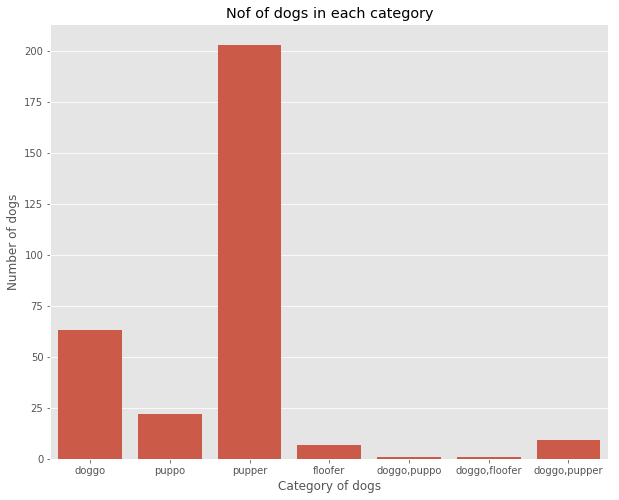

In [87]:
fig_dims = (10, 8)
twitter_df_clean = twitter_df_clean[twitter_df_clean.dog_stage != "None"]
fig, ax = plt.subplots(figsize=fig_dims)
colors = sb.color_palette()[0]
sb.countplot(data = twitter_df_clean, x='dog_stage', color = colors)
plt.ylabel('Number of dogs',)
plt.xlabel('Category of dogs')
plt.title('Nof of dogs in each category');

### Conclusions
___The above graph shows that most of the dogs belong to pupper category. doggo,puppo and doggo,floofer has the least no of dogs___

***The average rating of dogs based on category***

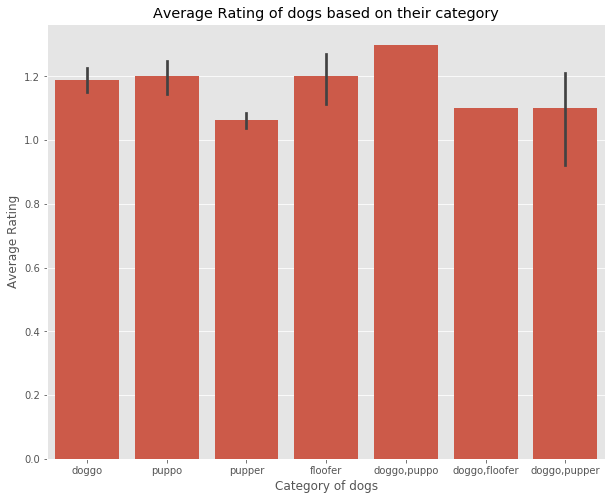

In [88]:
fig_dims = (10,8)
twitter_df_clean = twitter_df_clean[twitter_df_clean.dog_stage != "None"]
fig, ax = plt.subplots(figsize=fig_dims)
sb.barplot(data=twitter_df_clean, x='dog_stage', y='rating', color=colors);
plt.title('Average Rating of dogs based on their category');
plt.xlabel('Category of dogs')
plt.ylabel('Average Rating');

### Conclusions
__The doggo,puppo category hav  highest average rating and highest deviation__

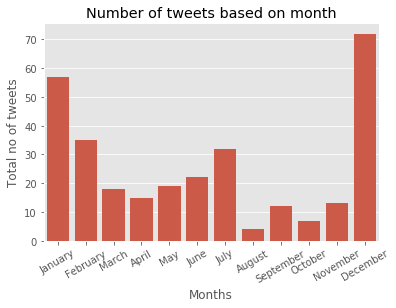

In [89]:
x_marker = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
            'November', 'December']
sb.countplot(data=twitter_df_clean, x='Month', order=x_marker, color=colors);
plt.title('Number of tweets based on month')
plt.xlabel('Months')
plt.xticks(rotation=30)
plt.ylabel('Total no of tweets');

### Conclusions
***The December have highest tweets***

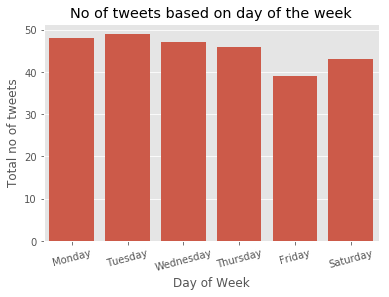

In [90]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.countplot(data=twitter_df_clean, x='Day', order=x_marker, color=colors);
plt.title('No of tweets based on day of the week')
plt.xlabel('Day of Week')
plt.xticks(rotation=15)
plt.ylabel('Total no of tweets');

***he above graph shows that most of the tweets are done on Tuseday and gradually decreasing by the end of the week***

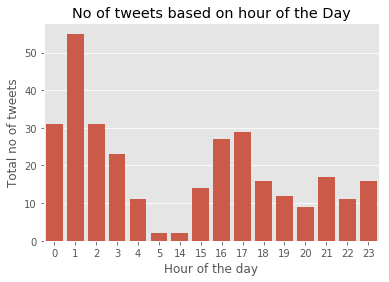

In [91]:
twitter_df_clean.groupby('Hour').count()
sb.countplot(data=twitter_df_clean, x='Hour', color=colors);
plt.xlabel('Hour of the day')
plt.ylabel('Total no of tweets')
plt.title('No of tweets based on hour of the Day');


### Conclusions

***The above graph shows that most of the tweets are done early in the morning or in the evening. The time between 5AM and 2PM has the least number of tweets***


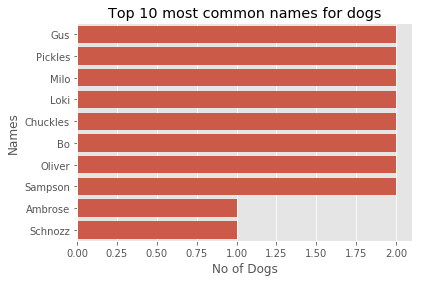

In [92]:
neighbourhood_counts = twitter_df_clean['name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
sb.countplot(data = twitter_df_clean, y = 'name', order = neighbourhood_order[2:12], color=colors)
plt.xlabel('No of Dogs')
plt.ylabel('Names')
plt.title('Top 10 most common names for dogs');




### Conclusions

***The above graph shows that the most common names used for dogs is Pickles , Loki and Sampson  followed by Bo, Penny and others***


In [93]:
twitter_df_clean[(twitter_df_clean['rating']>=1.4) & (twitter_df_clean['name'] != 'None')][['name', 'rating']].sort_values(by=['rating'], ascending=False)

,name,rating
9,Cassie,1.4
253,Smiley,1.4
278,Doobert,1.4
313,Gabe,1.4
318,Sundance,1.4
332,Sunny,1.4
333,Bo,1.4
399,Ollie,1.4
455,Laika,1.4


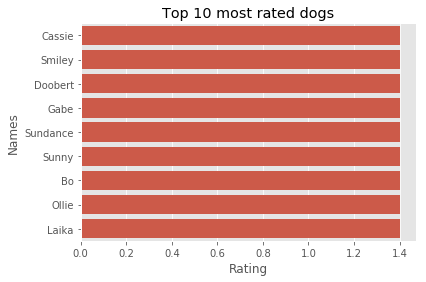

In [94]:
temp_df = twitter_df_clean[(twitter_df_clean['rating']>1.3) & (twitter_df_clean['name'] != 'None')][['name', 'rating']].sort_values(by=['rating'], ascending=False)[:10]
sb.barplot(data = temp_df, x = 'rating', y = 'name', color=colors)
plt.xlabel('Rating')
plt.ylabel('Names')
plt.title('Top 10 most rated dogs');

### Conclusions
***The 10 most rated dog***

### What is the most common dog?

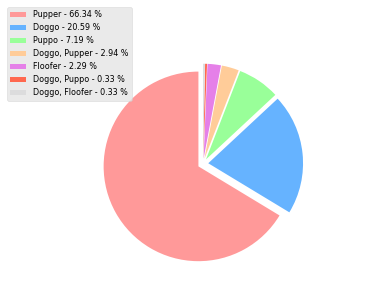

In [95]:
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list( twitter_df_clean[ twitter_df_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:7])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E580E8','#FF684F','#DCDCDD']
porcent = 100.*y/y.sum()


explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.8 ,explode = explode)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]


plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.axis('equal')

plt.savefig('Most_common_dog.png', bbox_inches='tight')


### Conclusions
***Pupper is the most common dog in dog_stage***

In [96]:
twitter_df_clean.to_csv('twitter_archive_master.csv')